
# Netflix Titles Dataset - EDA Notebook

This notebook covers:
1. Import Libraries  
2. Load Dataset  
3. Explore Data  
4. Data Cleaning  
5. Analysis with NumPy & Pandas  
6. Visualization with Matplotlib  
7. Visualization with Seaborn


### 1. Import Libraries

In [1]:

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### 2. Load Dataset

In [2]:

# 2. Load Dataset
df = pd.read_csv("netflix_titles.csv")
print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 3. Explore Data

In [3]:

# 3. Explore Data
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nBasic Info:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:")
df.describe(include='all').T


Shape of dataset: (8807, 12)

Column names:
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing Values:
 show_id            0
type           

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Data Cleaning

In [4]:

# 4. Data Cleaning

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Confirm cleaning
print("Missing values after cleaning:\n", df.isnull().sum())
df.head()


Missing values after cleaning:
 show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      88
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64


C:\Users\keert\AppData\Local\Temp\ipykernel_2520\2055369571.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Unknown", inplace=True)
C:\Users\keert\AppData\Local\Temp\ipykernel_2520\2055369571.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 5. Analysis with Numpy & Pandas

In [5]:

# 5. Analysis with Numpy & Pandas

# Count of Movies vs TV Shows
type_counts = df['type'].value_counts()
print("Movies vs TV Shows:\n", type_counts)

# Most common countries
top_countries = df['country'].value_counts().head(10)
print("\nTop 10 countries producing Netflix content:\n", top_countries)

# Yearly release trend
df['release_year'] = df['release_year'].astype(int)
yearly_count = df['release_year'].value_counts().sort_index()

# Numpy example: Average word count in titles
title_lengths = df['title'].apply(lambda x: len(x.split()))
print("\nAverage title word count:", np.mean(title_lengths))


Movies vs TV Shows:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Top 10 countries producing Netflix content:
 country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

Average title word count: 3.1108209378903147


### 6. Visualization with Matplotlib

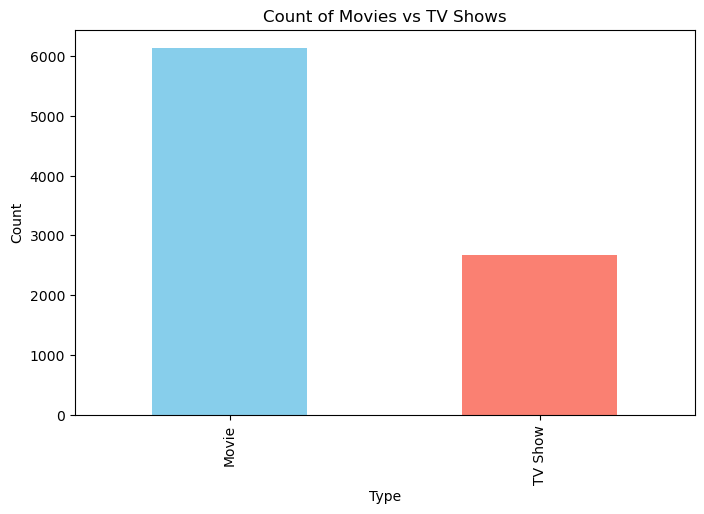

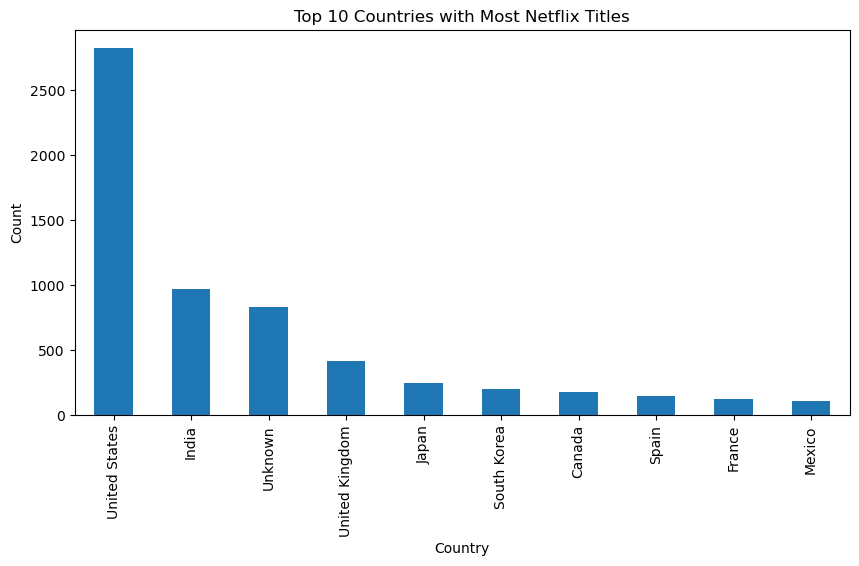

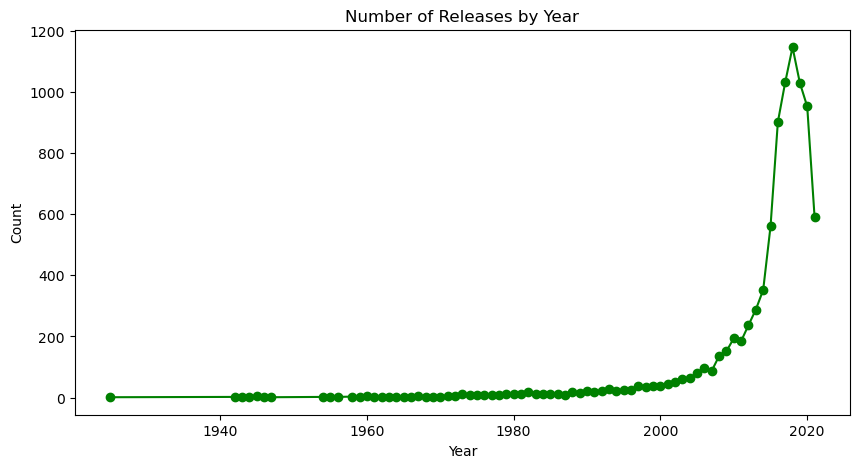

In [6]:

# 6. Visualization with Matplotlib

plt.figure(figsize=(8,5))
type_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(yearly_count.index, yearly_count.values, color='green', marker='o')
plt.title("Number of Releases by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()



### 7. Visualization with Seaborn

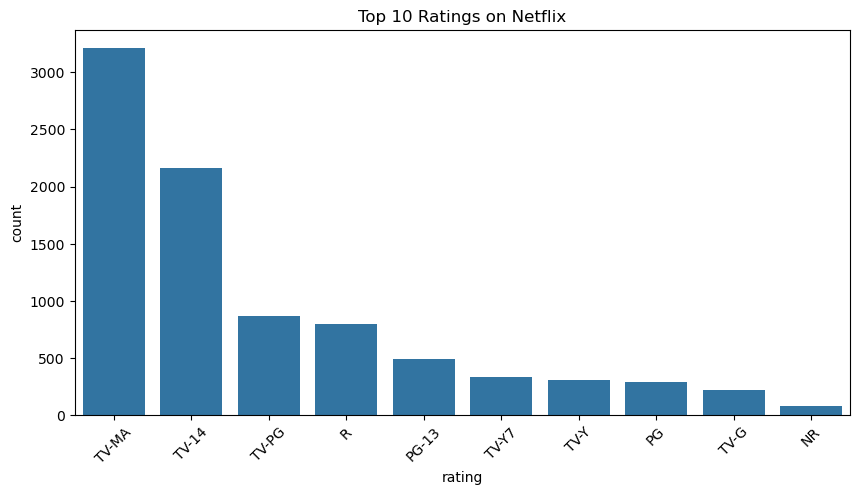

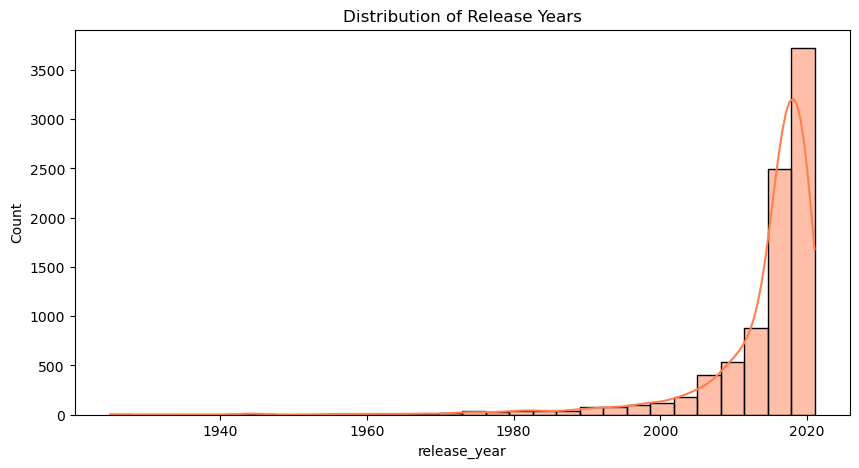

C:\Users\keert\AppData\Local\Temp\ipykernel_2520\2480561279.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='type', y='release_year', data=df, estimator=np.mean, ci=None)


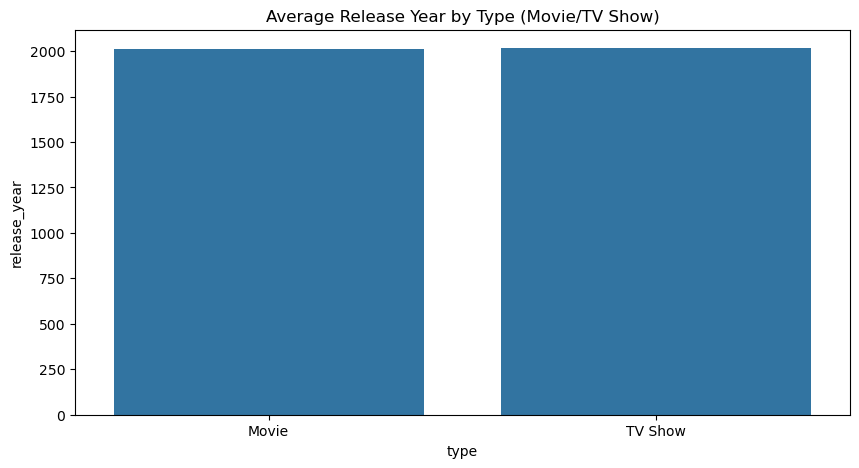

In [7]:

# 7. Visualization with Seaborn

plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index[:10])
plt.title("Top 10 Ratings on Netflix")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['release_year'], bins=30, kde=True, color='coral')
plt.title("Distribution of Release Years")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='type', y='release_year', data=df, estimator=np.mean, ci=None)
plt.title("Average Release Year by Type (Movie/TV Show)")
plt.show()
